<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Carragemento dos dados 

In [0]:
!git clone https://github.com/jenaroaaugusto/Music_Symbols.git

Cloning into 'Music_Symbols'...
remote: Enumerating objects: 4151, done.
remote: Counting objects: 100% (4151/4151), done.
remote: Compressing objects: 100% (2705/2705), done.
remote: Total 4151 (delta 1456), reused 4136 (delta 1444), pack-reused 0
Receiving objects: 100% (4151/4151), 1.47 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (1456/1456), done.


In [0]:
trainDir = os.path.join('/content/Music_Symbols/conjunto', 'train')
# validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')
testDir= os.path.join('/content/Music_Symbols/conjunto','val')

In [0]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.bmp')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

/content/Music_Symbols/conjunto/train
3271
['CLEF_Bass' 'ACCIDENTAL_Flat' 'ACCIDENTAL_Sharp' 'CLEF_Alto'
 'ACCIDENTAL_DoubSharp' 'CLEF_Trebble' 'ACCIDENTAL_Natural']


In [0]:
test_dir = pathlib.Path(""+testDir)
print(test_dir)
total_test = len(list(test_dir.glob('*/*.bmp')))
print(total_test)
CLASS_NAMEST=np.array(os.listdir(test_dir))
print(CLASS_NAMEST)

/content/Music_Symbols/conjunto/val
822
['CLEF_Bass' 'ACCIDENTAL_Flat' 'ACCIDENTAL_Sharp' 'CLEF_Alto'
 'ACCIDENTAL_DoubSharp' 'CLEF_Trebble' 'ACCIDENTAL_Natural']


In [0]:
diretorio=os.listdir(test_dir)
caminhos=list(test_dir.glob('*/*.bmp'))

#Definição de execução

In [0]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 28
IMG_WIDTH = 28


#Pre-Procesamento 
Geração do Generator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    rotation_range=45,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split = .2)
val_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
training_set = train_datagen.flow_from_directory(train_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = True,
                                        subset='training')

validation_set = val_datagen.flow_from_directory(train_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = False,
                                        subset='validation')

test_set = test_datagen.flow_from_directory(test_dir,
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        batch_size=32,
                                        color_mode="grayscale",
                                        class_mode='categorical',
                                        shuffle = False,)

Found 2621 images belonging to 7 classes.
Found 651 images belonging to 7 classes.
Found 822 images belonging to 7 classes.


#Rede Neural Convolucional





#CNN

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),padding="same", 
                            activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

#Camada Densa

In [0]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

#Definição de Metricas

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


#Definição de complicalção

*   Função de Otimização 
*   Função de perda 
*   Metricas de avaliação



In [0]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)

#Visualização do modelo

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

#Treinamento

In [0]:
history = model.fit(training_set,
                    steps_per_epoch=training_set.samples// batch_size,
                    epochs=epochs,
                    validation_data=validation_set,
                    validation_steps = validation_set.samples// batch_size)

Epoch 1/20
81/81 [==============================] - 7s 82ms/step - loss: 1.8257 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 15552.0000 - fn: 2592.0000 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6444 - val_loss: 1.6325 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3840.0000 - val_fn: 640.0000 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7570
Epoch 2/20
81/81 [==============================] - 6s 72ms/step - loss: 1.5589 - tp: 82.0000 - fp: 51.0000 - tn: 15483.0000 - fn: 2507.0000 - accuracy: 0.8589 - precision: 0.6165 - recall: 0.0317 - auc: 0.7829 - val_loss: 2.1878 - val_tp: 43.0000 - val_fp: 1.0000 - val_tn: 3839.0000 - val_fn: 597.0000 - val_accuracy: 0.8665 - val_precision: 0.9773 - val_recall: 0.0672 - val_auc: 0.6948
Epoch 3/20
81/81 [==============================] - 6s 72ms/step - loss: 1.3647 - tp: 290.0000 - fp: 180.0000 - tn: 15354.0000 - fn: 2299.0000 - accuracy: 0.8632 - precision: 0.6170 - recall:

#Visualizar Resultados

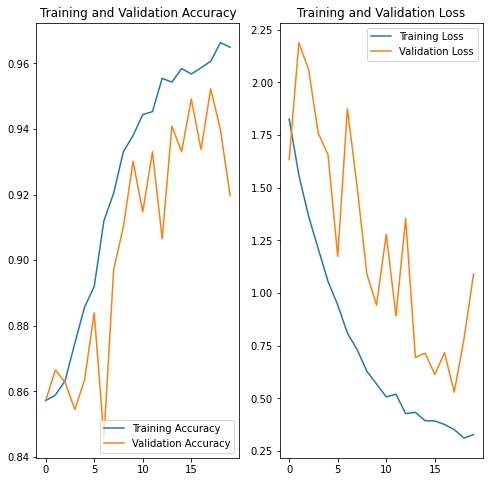

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

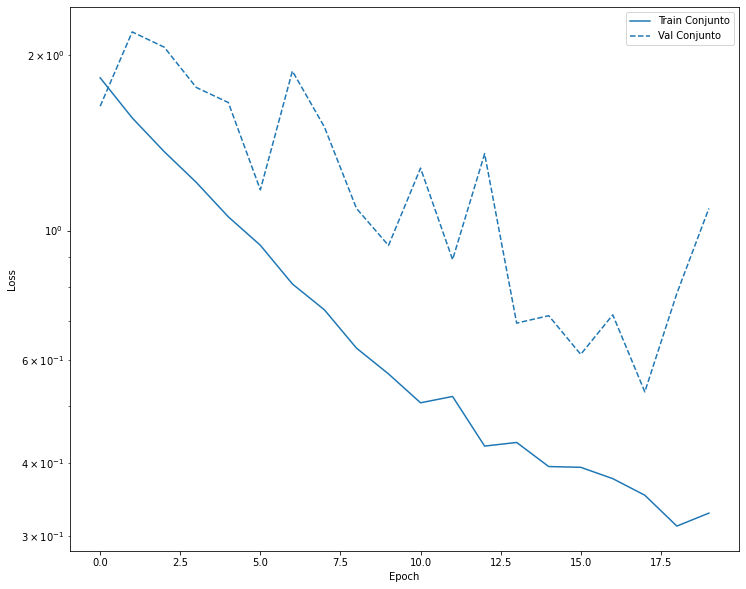

In [0]:
plot_loss(history, "Conjunto", 0)


In [0]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


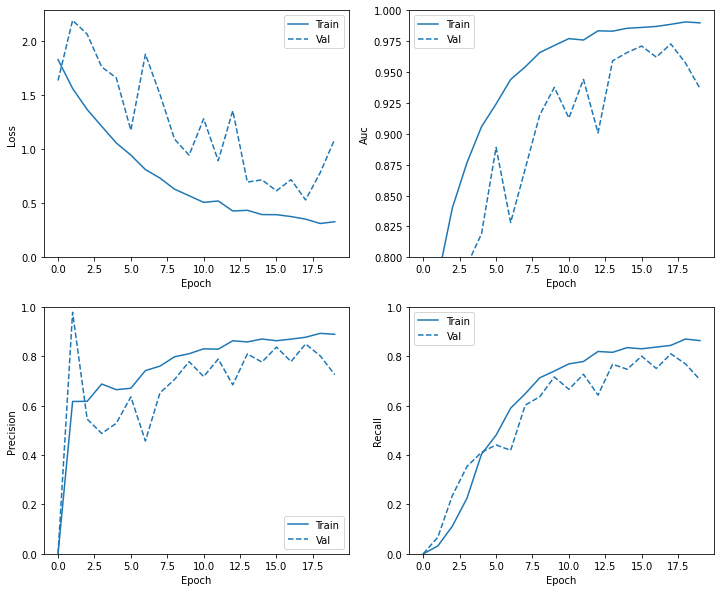

In [0]:
plot_metrics(history)

#Predict

In [0]:
nb=len(training_set.filenames)
ny=len(test_set.filenames)

NameError: ignored

In [0]:
 axy=test_set.class_indices
 names=list(axy.keys())
 nomedasclasses = np.array(names)

In [0]:
train_predictions_baseline = model.predict(training_set,steps=np.ceil(nb/batch_size))

test_predictions_baseline = model.predict(test_set,steps=np.ceil(ny/batch_size))

In [0]:
true_labelsTrain=training_set.classes

true_labels =test_set.classes

In [0]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in test_predictions_baseline])

x_true = true_labelsTrain
x_pred = np.array([np.argmax(x) for x in train_predictions_baseline])

In [0]:
tf.math.confusion_matrix(y_true,y_pred)

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 92,   0,   1,   6,   1,   0,   0],
       [  0,  41,  62,   1,   0,   0,   0],
       [  0,   0,  82,   2,   0,   0,  11],
       [  0,   0,   0,  79,   1,   0,  17],
       [  0,   0,   0,   0, 124,   0,  28],
       [  0,   0,   2,   0,   4, 100,   4],
       [  0,   0,   0,   0,   2,   0, 162]], dtype=int32)>

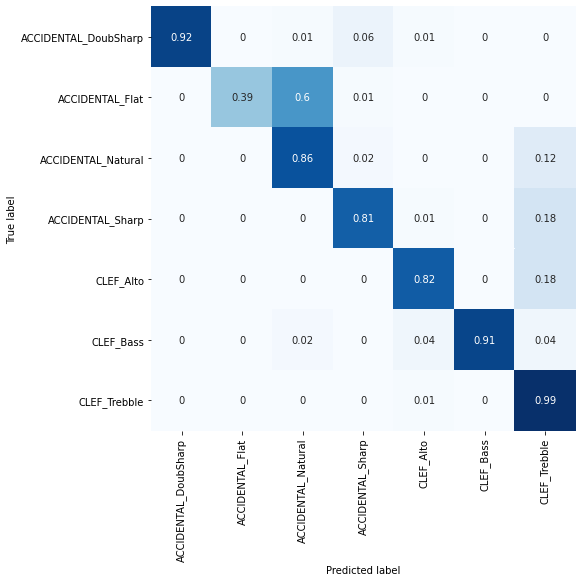

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Evaluate

In [0]:
baseline_results  = model.evaluate(test_set,batch_size=32,steps=np.ceil(nb/batch_size))

82/82 [==============================] - 2s 22ms/step - loss: 0.5207 - tp: 2127.0000 - fp: 438.0000 - tn: 15126.0000 - fn: 467.0000 - accuracy: 0.9502 - precision: 0.8292 - recall: 0.8200 - auc: 0.9788


In [0]:
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.5207143425941467
tp :  2127.0
fp :  438.0
tn :  15126.0
fn :  467.0
accuracy :  0.9501596689224243
precision :  0.8292397856712341
recall :  0.8199691772460938
auc :  0.9788224101066589



In [0]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       100
           1       1.00      0.39      0.57       104
           2       0.56      0.86      0.68        95
           3       0.90      0.81      0.85        97
           4       0.94      0.82      0.87       152
           5       1.00      0.91      0.95       110
           6       0.73      0.99      0.84       164

    accuracy                           0.83       822
   macro avg       0.87      0.81      0.82       822
weighted avg       0.87      0.83      0.82       822



In [0]:
confusion_matrix(y_true,y_pred)

array([[ 92,   0,   1,   6,   1,   0,   0],
       [  0,  41,  62,   1,   0,   0,   0],
       [  0,   0,  82,   2,   0,   0,  11],
       [  0,   0,   0,  79,   1,   0,  17],
       [  0,   0,   0,   0, 124,   0,  28],
       [  0,   0,   2,   0,   4, 100,   4],
       [  0,   0,   0,   0,   2,   0, 162]])

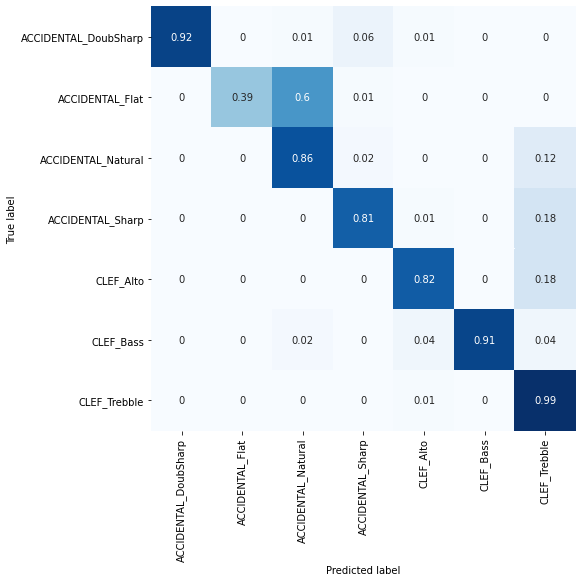

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

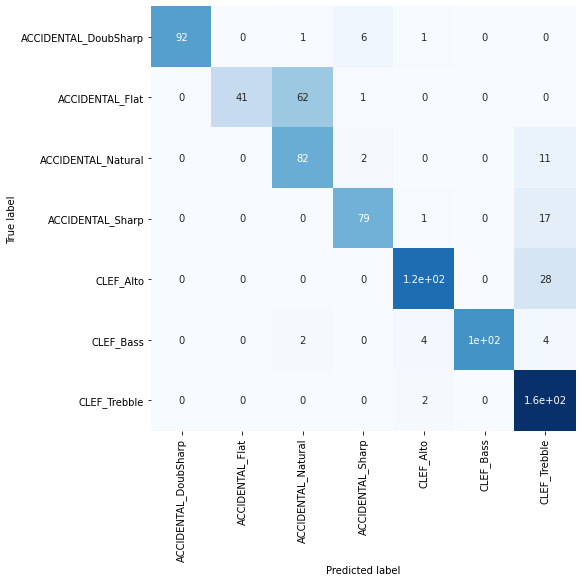

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()